In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

import contextily as ctx

In [6]:
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [7]:
us_comms = communities[communities.country == "US"]

<AxesSubplot:ylabel='Frequency'>

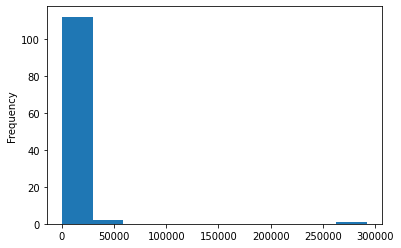

In [13]:
us_comms.population.plot(kind='hist')

In [15]:
us_comms.population.max()

291826

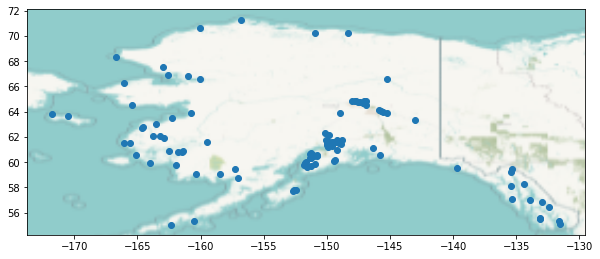

In [25]:
fig, ax = plt.subplots( figsize=(10, 10))

us_comms.plot(ax=ax)
cx.add_basemap(ax=ax, 
               attribution=False,
               crs=us_comms.crs.to_string())
               #source=cx.providers.Stamen.TonerLite)
plt.show()